In [2]:
#print(data,len(data))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('ligue1_csv')
df.set_index('Position', drop=True, inplace=True)
print(df)

                            Club  Pts   J   G  N   P  Bp  Bc  Diff.  Pts/J  \
Position                                                                     
1            Paris Saint-Germain   49  20  16  1   3  50  14     36   2.45   
2         Olympique de Marseille   41  20  12  5   3  30  21      9   2.05   
3               Stade Rennais FC   36  20  11  3   6  25  18      7   1.80   
4                      FC Nantes   32  20  10  2   8  19  18      1   1.60   
5                           LOSC   31  20   9  4   7  24  22      2   1.55   
6         Montpellier Hérault SC   30  20   8  6   6  28  20      8   1.50   
7             Olympique Lyonnais   29  20   8  5   7  31  19     12   1.45   
8                 Stade de Reims   29  20   7  8   5  17  13      4   1.45   
9                      AS Monaco   29  20   8  5   7  35  33      2   1.45   
10                    Angers SCO   29  20   8  5   7  23  25     -2   1.45   
11                      OGC Nice   28  20   8  4   8  29  28    

In [4]:
def moyVar(X):
    n = len(X)
    
    if n==0:
        return None
    else:
        s1, s2 = 0, 0
        for x in X:
            s1 = s1 + x
            s2 = s2 + x*x
        m = s1/n
        v = s2/n - m**2
        ve = v*n/(n-1)
        e_type = np.sqrt(ve)
        return m, v, ve, e_type   # moyenne, var, var empirique, ecart_type

def moyVarP(X, N):
    p1, p2 = len(X), len(N)
    if p1==0 or p2 != p1:
        return None
    else:
        s1, s2, n = 0, 0, 0
        for k in range(1,p1):
            n = n + N[k]
            z = N[k]*X[k]
            s1 = s1 + z
            s2 = s2 + z*X[k]
        m = s1/n
        return m,s2/n - m**2

def moyDist(X):
    n = len(X)
    moyenne, variance, ve, e_type = moyVar(X)
    D = []
    for x in X:
        D.append(x-moyenne)
    print(D)
    D2 = [k**2 for k in D]
    var = sum(D2)/(n-1)    # empirique
    ecart_type = np.sqrt(var)
    return var, variance, D, D2 , ecart_type

In [5]:
print(moyVar(df.Pts))
#print(moyVar(df['Pts/J']))
#print(moyVarP(df.Pts,df['Pts/J']))

(27.6, 68.2399999999999, 71.83157894736831, 8.475351258052276)


In [6]:
for k in range(1,12):
    print(df.columns[k],moyVar(df.iloc[:,k]),df.iloc[:,k].var())
    

Pts (27.6, 68.2399999999999, 71.83157894736831, 8.475351258052276) 71.83157894736841
J (20.0, 0.0, 0.0, 0.0) 0.0
G (7.6, 9.440000000000005, 9.936842105263162, 3.15227570260965) 9.936842105263159
N (4.8, 3.2600000000000016, 3.431578947368423, 1.8524521444205848) 3.431578947368421
P (7.6, 6.039999999999999, 6.357894736842105, 2.5214866124653734) 6.3578947368421055
Bp (25.15, 60.72750000000008, 63.923684210526396, 7.99522884041016) 63.92368421052631
Bc (25.15, 59.92750000000012, 63.08157894736855, 7.942391261287028) 63.08157894736843
Diff. (0.0, 151.6, 159.57894736842104, 12.632456109894902) 159.57894736842104
Pts/J (1.3800000000000001, 0.17059999999999986, 0.17957894736842092, 0.423767562902614) 0.17957894736842103
Bp/J (1.2574999999999998, 0.1518187500000001, 0.15980921052631591, 0.3997614420205079) 0.1598092105263158
Bc/J (1.2574999999999998, 0.14981875000000033, 0.15770394736842142, 0.3971195630643515) 0.15770394736842108


In [8]:
#print(df[df.Pts>moyenne])
#print(df[df.Pts<moyenne])

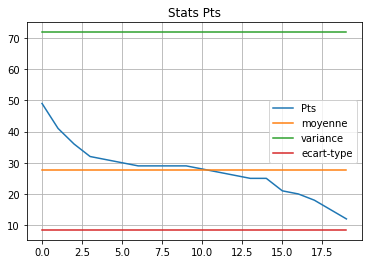

In [9]:
l = len(df)
x = np.arange(l)
y = df.Pts
moyenne,variance, ve, e_type = moyVar(y)
plt.title('Stats Pts')
plt.plot(x,y)
plt.plot(x,np.ones(l)*moyenne,label='moyenne')    # df.mean()
plt.plot(x,np.ones(l)*ve,label='variance')        # df.var()
plt.plot(x,np.ones(l)*e_type,label='ecart-type')  # df.std()
plt.grid()
plt.legend()
plt.show()

[21.4, 13.399999999999999, 8.399999999999999, 4.399999999999999, 3.3999999999999986, 2.3999999999999986, 1.3999999999999986, 1.3999999999999986, 1.3999999999999986, 1.3999999999999986, 0.3999999999999986, -0.6000000000000014, -1.6000000000000014, -2.6000000000000014, -2.6000000000000014, -6.600000000000001, -7.600000000000001, -9.600000000000001, -12.600000000000001, -15.600000000000001]


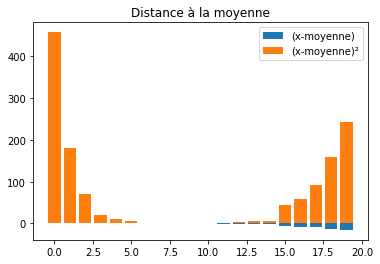

In [10]:
v = moyDist(df.Pts)
# var, variance, D, D2 , ecart_type
plt.bar(x,v[2],label='(x-moyenne)')
plt.bar(x,v[3], label='(x-moyenne)²')
plt.title('Distance à la moyenne')
plt.legend()
plt.show()

Position
1     49
2     41
3     36
4     32
5     31
6     30
7     29
8     29
9     29
10    29
11    28
12    27
13    26
14    25
15    25
16    21
17    20
18    18
19    15
20    12
Name: Pts, dtype: int64


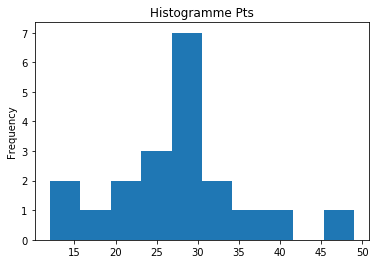

In [13]:
# répartition des points
print(df.Pts)
df.Pts.plot.hist()
plt.title('Histogramme Pts')
plt.show()

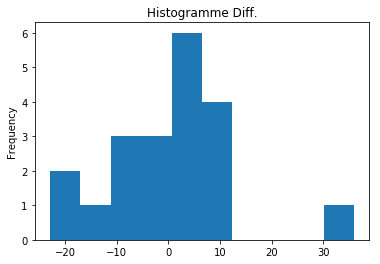

In [14]:
df['Diff.'].plot.hist()
plt.title('Histogramme Diff.')
plt.show()

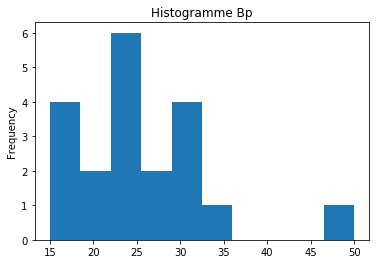

In [15]:
df['Bp'].plot.hist()
plt.title('Histogramme Bp')
plt.show()

In [16]:
# classement par valeurs décroissantes de Bc,Bp, Diff.
bc = df.sort_values('Bc',ascending=False)
bp = df.sort_values('Bp',ascending=False)
diff = df.sort_values('Diff.',ascending=False)
print(bc.iloc[:,:9])
print(bp.iloc[:,:9])
print(diff.iloc[:,:9])

                            Club  Pts   J   G  N   P  Bp  Bc  Diff.
Position                                                           
20                   Toulouse FC   12  20   3  3  14  21  44    -23
18                     Amiens SC   18  20   4  6  10  23  39    -16
9                      AS Monaco   29  20   8  5   7  35  33      2
19               Nîmes Olympique   15  20   3  6  11  15  33    -18
15              AS Saint-Etienne   25  20   7  4   9  22  31     -9
17                       FC Metz   20  20   4  8   8  18  28    -10
11                      OGC Nice   28  20   8  4   8  29  28      1
14             Stade Brestois 29   25  20   6  7   7  26  26      0
10                    Angers SCO   29  20   8  5   7  23  25     -2
12          RC Strasbourg Alsace   27  20   8  3   9  23  25     -2
13         Girondins de Bordeaux   26  20   7  5   8  29  24      5
16                     Dijon FCO   21  20   5  6   9  15  22     -7
5                           LOSC   31  20   9  4

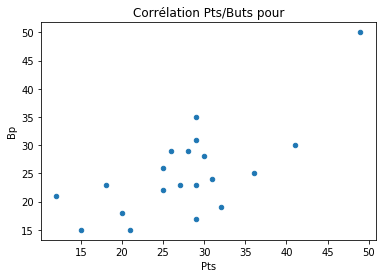

In [17]:
df.plot.scatter(x='Pts', y='Bp')
plt.title('Corrélation Pts/Buts pour')
plt.show()

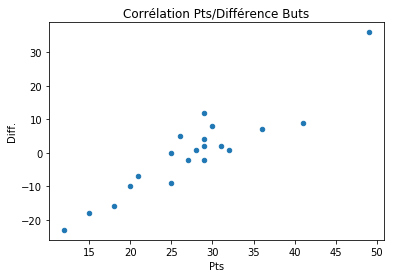

In [18]:
df.plot.scatter(x='Pts', y='Diff.')
plt.title('Corrélation Pts/Différence Buts')
plt.show()

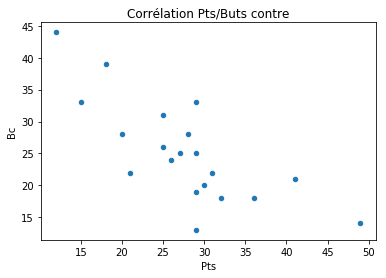

In [19]:
df.plot.scatter(x='Pts', y='Bc')
plt.title('Corrélation Pts/Buts contre')
plt.show()

In [24]:
X = df['Diff.']
Y = df['Pts']
corr = np.cov(X, Y)
corr

array([159.57894737,  99.        ])

In [25]:
from scipy.stats import pearsonr, spearmanr
corr, _ = pearsonr(X, Y)
corr

0.9246762225234297

In [26]:
corr, _ = spearmanr(X, Y)
corr

0.8533674680333503

In [27]:
X = df['Bp']
Y = df['Pts']
corr = np.cov(X, Y)
corr

array([[63.92368421, 48.22105263],
       [48.22105263, 71.83157895]])

In [31]:
corr = pearsonr(X, Y)
corr

(0.7116198951014452, 0.00043366314257380735)

In [30]:
corr = spearmanr(X, Y)
corr

SpearmanrResult(correlation=0.5554304301536794, pvalue=0.011008365950184635)

In [32]:
X = df['Bc']
Y = df['Pts']
corr = np.cov(X, Y)
corr

array([[ 63.08157895, -50.77894737],
       [-50.77894737,  71.83157895]])

In [33]:
corr, _ = pearsonr(X, Y)
corr

-0.7543531527298554

In [34]:
corr, _ = spearmanr(X, Y)
corr

-0.7813938425234873